In [10]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import torch
#import torch.nn as nn
#import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from torch.utils.data import DataLoader, TensorDataset
#from torch.utils.data import Subset, DataLoader
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
#import pytorch_lightning as pl
#import torch
import numpy as np
import logging
import time
import matplotlib.pyplot as plt
#import torch.nn.functional as F
from sklearn.cluster import KMeans


In [3]:
df = pd.read_csv('../project_2/catdogdata.txt', delimiter = ' ')
df['label'] = 0 # cats are the first 99 entries
df.loc[99:198, 'label'] = 1 # dogs are the next 99 entries
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V4088,V4089,V4090,V4091,V4092,V4093,V4094,V4095,V4096,label
1,23,23,20,20,9,9,9,4,4,4,...,108,108,108,89,65,51,31,23,9,0
2,250,250,250,244,244,244,244,244,232,232,...,244,244,232,244,244,244,244,232,244,0
3,137,137,137,144,151,151,151,158,151,151,...,89,89,78,78,78,100,102,124,124,0
4,55,55,55,55,55,55,55,55,55,55,...,45,45,45,45,45,45,37,45,52,0
5,173,173,173,173,158,158,158,158,153,149,...,64,64,48,48,77,98,64,45,45,0


In [4]:
def plot_examples(df, n=10):
    """
    Plot n examples from the dataset.
    Assumes the last column is the label.
    """
    indices = np.random.choice(df.index, n, replace=False)
    df = df.loc[indices]
    
    fig, axes = plt.subplots(1, n, figsize=(2.5 * n, 3))
    for i in range(n):
        image = df.iloc[i, :-1].values.reshape((64, 64))
        label = df.iloc[i, -1]
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

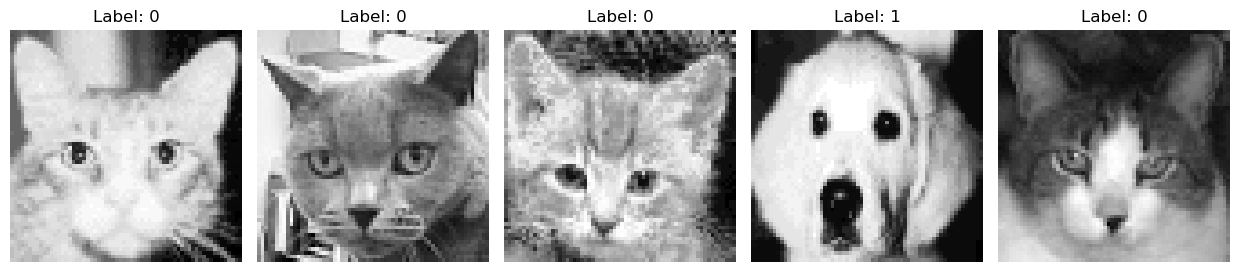

In [5]:
# Rotate all images 90 degrees clockwise
def rotate_image(image):
    return np.rot90(image.reshape(64, 64), -1).flatten()

# Apply the rotation to all rows and update the DataFrame
rotated_images = np.array([rotate_image(row.values) for _, row in df.iloc[:, :-1].iterrows()])
df.iloc[:, :-1] = rotated_images

# plot example images after rotation
plot_examples(df, n=5)

In [6]:
df_mnist = pd.read_csv('../project_2/Numbers.txt', delimiter=' ')
df_mnist['label'] = df_mnist.iloc[:, 0]
df_mnist = df_mnist.iloc[:, 1:]
X_mnist = df_mnist.iloc[:, :-1].values
y_mnist = df_mnist.iloc[:, -1].values

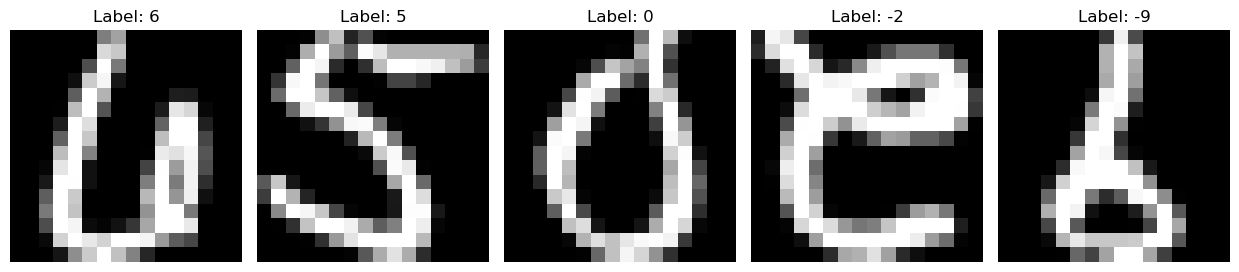

In [7]:
def plot_examples_mnist(df, n=10):
    indices = np.random.choice(df.index, n, replace=False)
    df = df.loc[indices]
    
    fig, axes = plt.subplots(1, n, figsize=(2.5 * n, 3))
    for i in range(n):
        image = df.iloc[i, :-1].values.reshape((16, 16))
        label = df.iloc[i, -1]
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()
    
# plot example images
plot_examples_mnist(df_mnist, n=5)

c:\Users\hampu\anaconda3\envs\umap-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\hampu\anaconda3\envs\umap-env\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


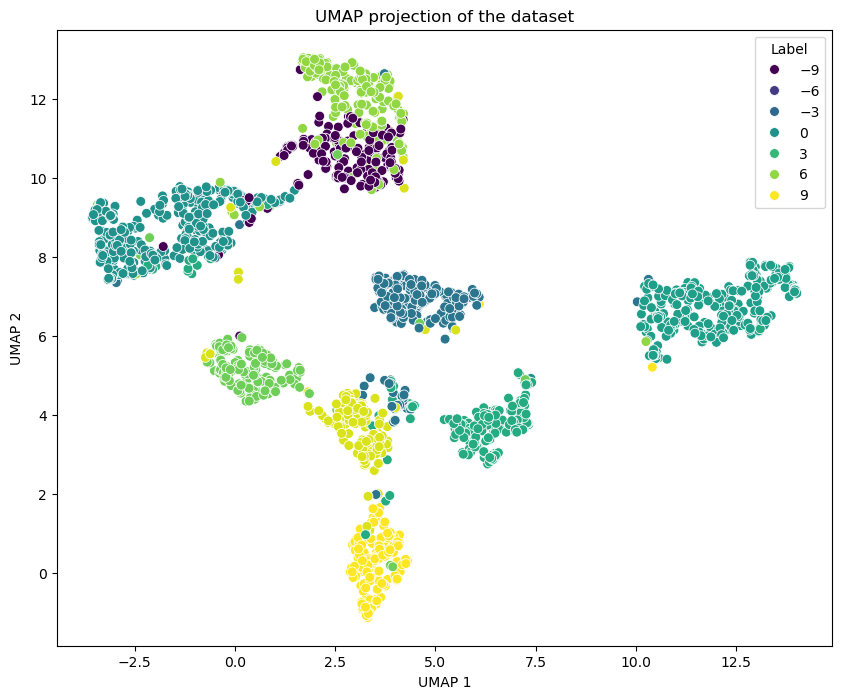

In [8]:
# Use UMAP to create a low-dimensional representation of the data
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and the last column is the label
X = df_mnist.iloc[:, :-1].values
y = df_mnist.iloc[:, -1].values
# Create a UMAP model
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the data
X_umap = umap_model.fit_transform(X)

# Plot the UMAP representation
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='viridis', s=50)
plt.title('UMAP projection of the dataset')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Label')
plt.show()

c:\Users\hampu\anaconda3\envs\umap-env\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


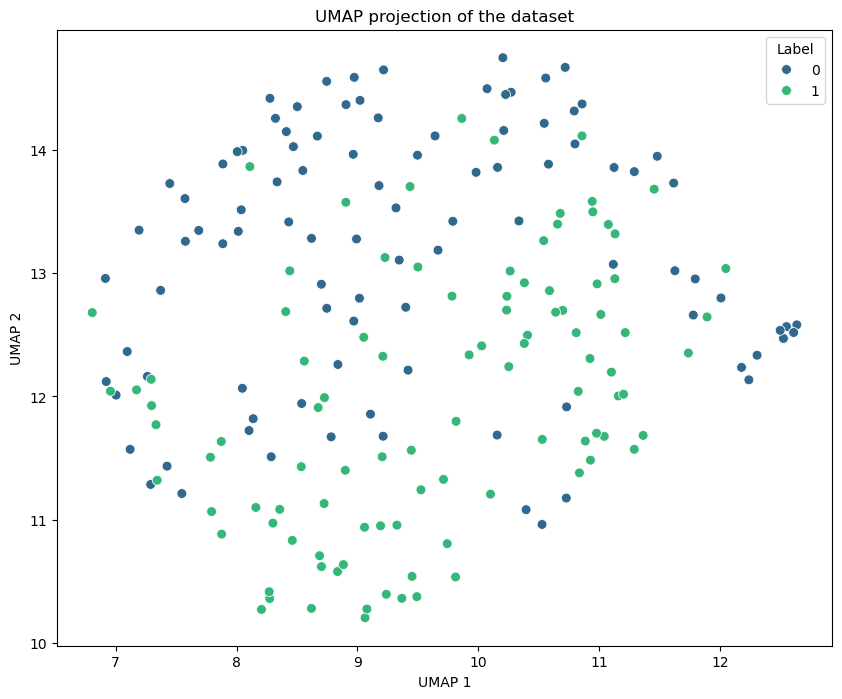

In [9]:
# Now for the cat-dog dataset
# Use UMAP to create a low-dimensional representation of the data

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Create a UMAP model
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the data
X_umap = umap_model.fit_transform(X)
# Plot the UMAP representation
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='viridis', s=50)
plt.title('UMAP projection of the dataset')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Label')
plt.show()

# K-means

Test

c:\Users\hampu\anaconda3\envs\umap-env\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(2000, 2)


Text(0.5, 1.0, 'K-means clustering on UMAP-reduced MNIST')

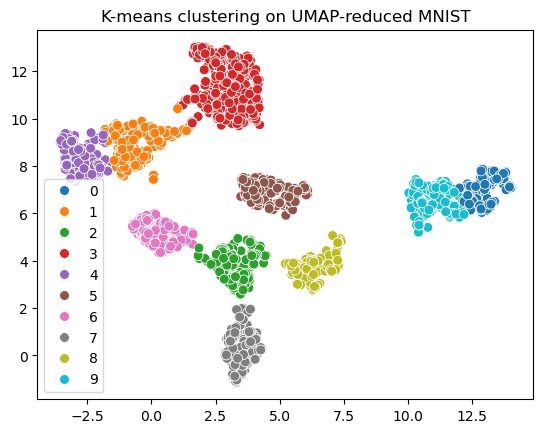

In [ ]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
X = df_mnist.iloc[:, :-1].values
y = df_mnist.iloc[:, -1].values
X_umap = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state=42).fit_transform(X)


kmeans.fit(X_umap)
labels = kmeans.predict(X_umap)

plt.figure()
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels, palette='tab10', s=50)
plt.title("K-means clustering on UMAP-reduced MNIST")

# Pick #of clusters using Elbow method and Silhouette score

In [59]:
from sklearn.metrics import silhouette_score

def get_elbow_score(X,cluster_size):
    W = []
    for k in cluster_size:
        kmeans = KMeans(n_clusters=k,n_init = 10, random_state=42)
        kmeans.fit(X)
        W.append(kmeans.inertia_)

    return W

def get_silhouette_score(X,cluster_size):
    scores = []
    for k in cluster_size:
        if k == 1: 
            scores.append(0)
            continue

        kmeans = KMeans(n_clusters=k,n_init = 10, random_state=42)
        score = silhouette_score(X, kmeans.fit_predict(X))

        scores.append(score)

    return scores

Using bootstrapped samples to get best k

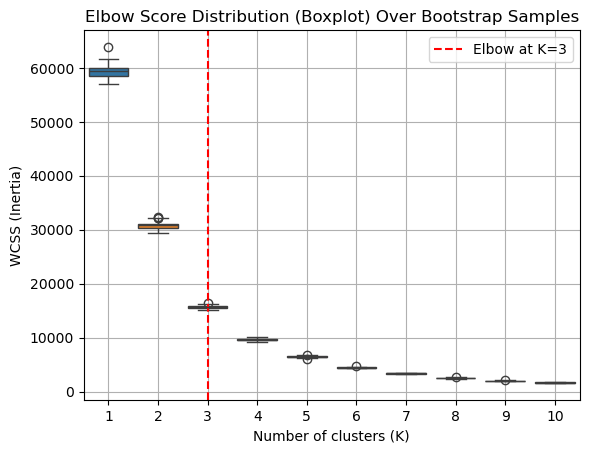

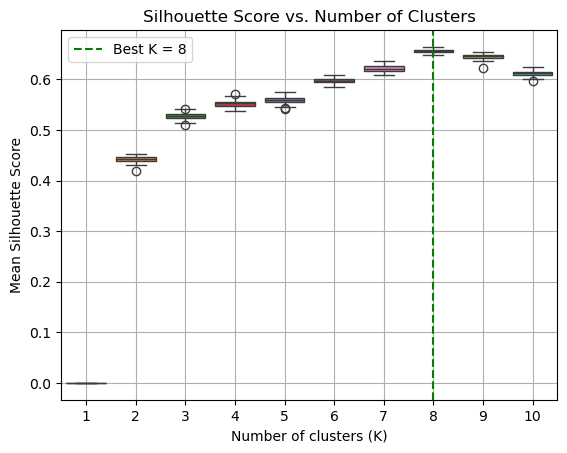

In [61]:
from sklearn.utils import resample
from kneed import KneeLocator

cluster_size = np.arange(1,11)
elbow_scores = []
silhouette_scores = []

iterations = 100
for i in range(iterations):
    X_bs, y_bs = resample(X_umap, y, replace=True)
    elbow = get_elbow_score(X_bs,cluster_size)
    silhouette = get_silhouette_score(X_bs,cluster_size)
    
    elbow_scores.append(elbow)
    silhouette_scores.append(silhouette)

#Elbow
elbow_scores = np.array(elbow_scores)
mean_scores = elbow_scores.mean(axis=0)  
kneedle = KneeLocator(x=cluster_size, y=mean_scores, curve='convex', direction='decreasing')

#Silhouette
silhouette_scores = np.array(silhouette_scores)
mean_silhouette = silhouette_scores.mean(axis=0)
best_k_index = np.argmax(mean_silhouette)
best_k = cluster_size[best_k_index]


plt.figure()
sns.boxplot(data=elbow_scores)
plt.axvline(kneedle.knee -1, color='red', linestyle='--', label=f'Elbow at K={kneedle.knee}')
plt.xticks(ticks=np.arange(len(cluster_size)), labels=cluster_size)
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Score Distribution (Boxplot) Over Bootstrap Samples")
plt.legend()
plt.grid(True)
plt.show()


plt.figure()
sns.boxplot(data=silhouette_scores)
plt.axvline(best_k-1, color='green', linestyle='--', label=f'Best K = {best_k}')
plt.xticks(ticks=np.arange(len(cluster_size)), labels=cluster_size)
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Mean Silhouette Score")
plt.legend()
plt.grid(True)
plt.show()

2. Stability-Based Evaluation (a form of pseudo-CV)

Bootstrap resampling or subsampling is used to test whether the clustering is stable:

Run clustering multiple times on resampled subsets of the data.
Use Adjusted Rand Index (ARI) or Normalized Mutual Information (NMI) to compare how similar the clusterings are across samples.

This tells you whether the clusters are reproducible.